### Lab Goals

In this lab, we will:

- Learn to implement the model fw,b for linear regression with one variable.

Tools
In this lab you will make use of:

NumPy, a popular library for scientific computing
Matplotlib, a popular library for plotting data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
import math, copy

### Create x_train and y_train

In [77]:
# x_train is the input variable (size in 100 square feet)
# y_train is the target (price in dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


### Number of training examples m or No. of samples for train a model

We will use m to denote the number of training examples.
Numpy arrays have a .shape parameter. x_train.shape returns a python tuple with an entry for each dimension.
x_train.shape[0] is the length of the array and number of examples as shown below.

In [8]:
# Shape of array
print(f"x_train.shape: {x_train.shape}")

x_train.shape: (2,)


In [11]:
# Number of elements in the array, sample size on which we are training
# m is the number of training examples
# One can also use the Python len() function to get the number of elements in the array (len(x_train)) but it is not recommended
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

Number of training examples is: 2


Training example x_i, y_i

In [12]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


Plotting the data
You can plot these two points using the scatter() function in the matplotlib library, as shown in the cell below.

The function arguments marker and c show the points as red crosses (the default is blue dots).
You can use other functions in the matplotlib library to set the title and labels to display

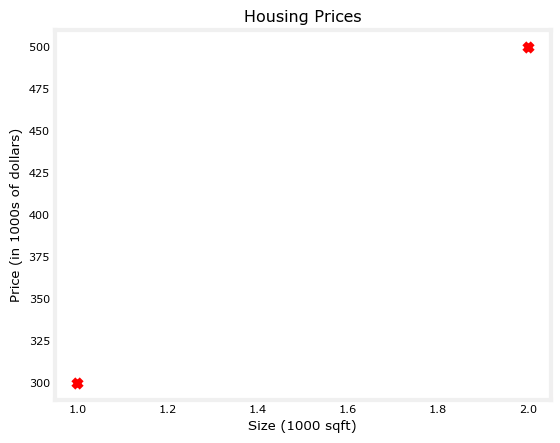

In [18]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

Model function
model function for linear regression

In [8]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


In [7]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0] # Number of training examples on which loop iterates
    f_wb = np.zeros(m)  # Initialize an array of zeros of size m to store the predicted values
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

In [9]:
tmp_f_wb = compute_model_output(x_train, w, b,)

In [10]:
tmp_f_wb

array([200., 300.])

Plot Predictions

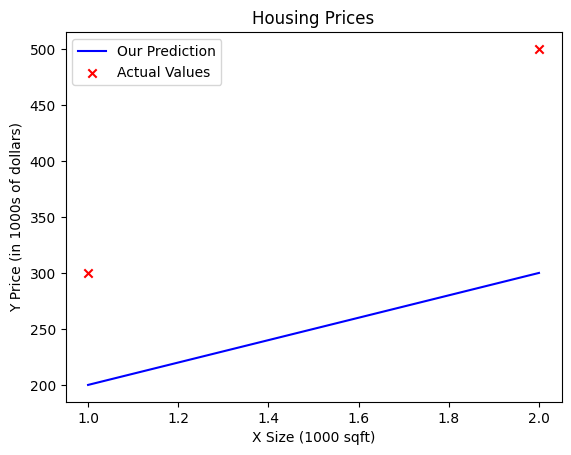

In [36]:
# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
# plt.scatter(x_train, tmp_f_wb, marker='x', c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Y Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('X Size (1000 sqft)')
plt.legend()
plt.show()

setting w = 100, b = 100 does not result in a line that fits our data.
lets try again with w = 200, b = 100

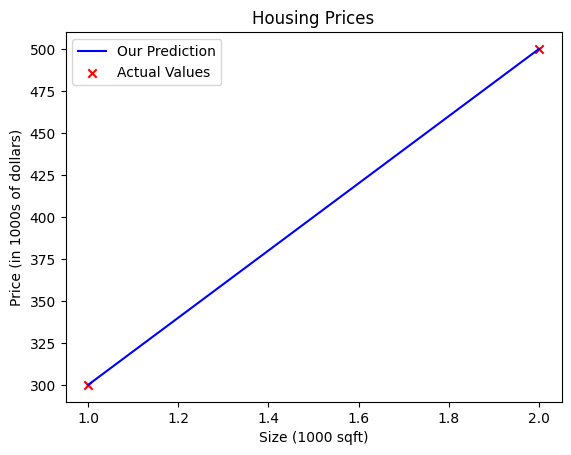

In [15]:
w = 200                         
b = 100

tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

Congratulations!
In this lab you have learned:

Linear regression builds a model which establishes a relationship between features and targets
In the example above, the feature was house size and the target was house price
for simple linear regression, the model has two parameters 
 and 
 whose values are 'fit' using training data.
once a model's parameters have been determined, the model can be used to make predictions on novel data.

Lets See What is Cost Function

In [78]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost = 0.0
    for i in range(m): 
        f_wb_i =  np.dot(x[i],w) + b   
        cost = cost + (f_wb_i - y[i])**2 
    total_cost = cost/(2*m)

    return total_cost

We will compute cost for both cases 
1 - w=100, b=100
2 - w=200, b=100

In [79]:
w = 100                         
b = 100

cost = compute_cost(x_train, y_train, w, b,)
print(f"Cost: {cost}")

Cost: 12500.0


In [80]:
w = 300                         
b = 50

cost = compute_cost(x_train, y_train, w, b,)
print(f"Cost: {cost}")

Cost: 6250.0


np.linspace(start, stop, num) generates num evenly spaced values between start and stop (inclusive)

w_range = np.linspace(50, 300, 100) creates 100 values between 50 and 300.

b_range = np.linspace(50, 300, 100) creates 100 values between 50 and 300.

In [43]:
# Parameter ranges
w_range = np.linspace(50, 250, 5)
b_range = np.linspace(50, 250, 5)

In [44]:
print(f"w_range: {w_range}")
print(f"b_range: {b_range}")

w_range: [ 50. 100. 150. 200. 250.]
b_range: [ 50. 100. 150. 200. 250.]


create a mesh grid of these w_range b_range to create every possible pair of w b

In [45]:
# Initialize a grid for the cost function
W, B = np.meshgrid(w_range, b_range)
print(f"W: {W}")
print(f"B: {B}")

W: [[ 50. 100. 150. 200. 250.]
 [ 50. 100. 150. 200. 250.]
 [ 50. 100. 150. 200. 250.]
 [ 50. 100. 150. 200. 250.]
 [ 50. 100. 150. 200. 250.]]
B: [[ 50.  50.  50.  50.  50.]
 [100. 100. 100. 100. 100.]
 [150. 150. 150. 150. 150.]
 [200. 200. 200. 200. 200.]
 [250. 250. 250. 250. 250.]]


In [46]:
cost_values = np.zeros(W.shape)

In [47]:
cost_values 

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [49]:
W.shape[1]

5

In [50]:
# Compute cost for each (w, b) pair
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        cost_values[i, j] = compute_cost(x_train, y_train, W[i, j], B[i, j])

In [51]:
cost_values

array([[40625., 21250.,  8125.,  1250.,   625.],
       [28125., 12500.,  3125.,     0.,  3125.],
       [18125.,  6250.,   625.,  1250.,  8125.],
       [10625.,  2500.,   625.,  5000., 15625.],
       [ 5625.,  1250.,  3125., 11250., 25625.]])

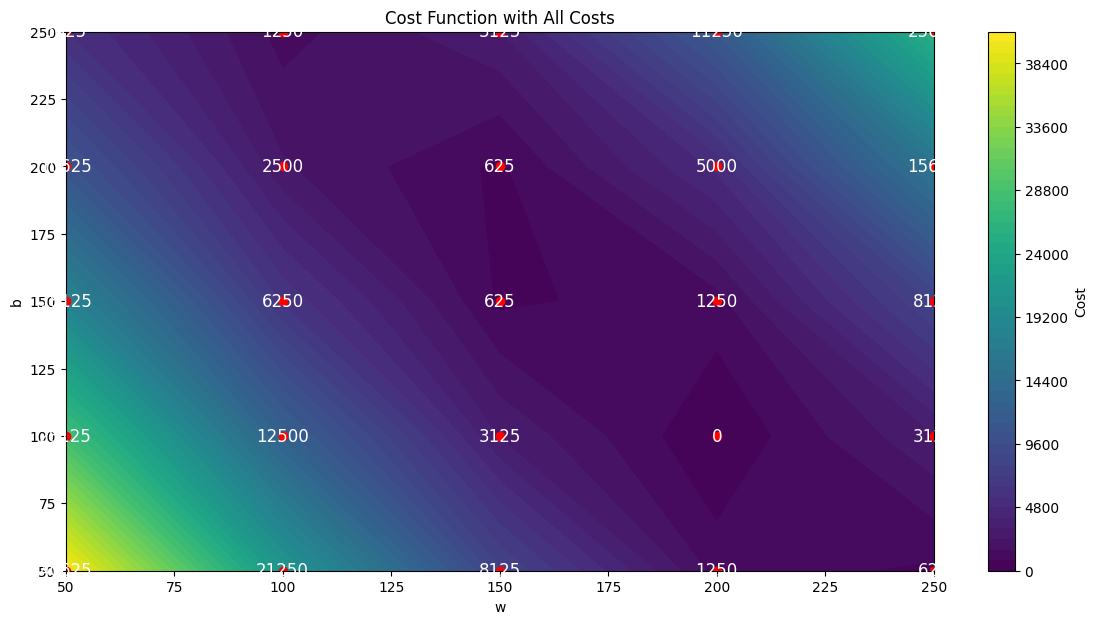

In [67]:
# Plotting the contour plot
plt.figure(figsize=(14, 7))  # Adjust figure size

contour = plt.contourf(W, B, cost_values, levels=50, cmap='viridis')  # Contour plot
plt.colorbar(contour, label='Cost')  # Color bar indicating cost values

# Plot all cost values as scatter points
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        plt.scatter(W[i, j], B[i, j], color='red', marker='o')
        plt.text(W[i, j], B[i, j], f'{cost_values[i, j]:.0f}', color='white', fontsize=12,
                 ha='center', va='center')
        
# Adding labels and title
plt.title('Cost Function with All Costs')
plt.xlabel('w')
plt.ylabel('b')

# Display the plot
plt.show()        

Gradient Descent for Linear Regression

Goal
automate the process of optimizing w and b using gradient descent.

Calculate Gradient for w and b,

dj_dw = Gradient for w

dj_db = Gradient for b

In [87]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0.0
    dj_db = 0.0
    
    for i in range(m):  
        f_wb_i = np.dot(x[i],w) + b
        dj_dw_i = np.dot(x[i], f_wb_i - y[i]) 
        dj_db_i = f_wb_i - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [89]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      # cost_function:     function to call to produce cost
      # gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [91]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


Cost versus iterations of gradient descent

A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

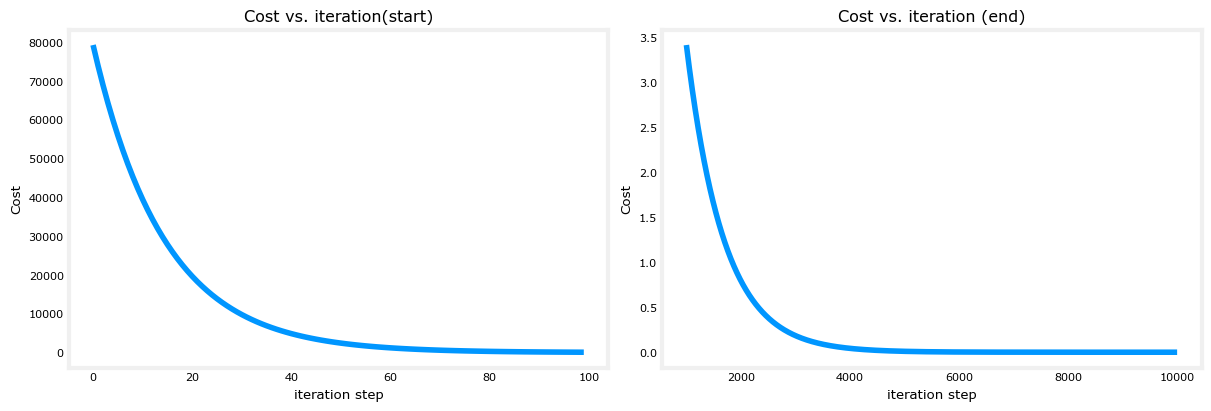

In [92]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

Predictions

Now that you have discovered the optimal values for the parameters w and b, you can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [93]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


Plotting

You can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b).

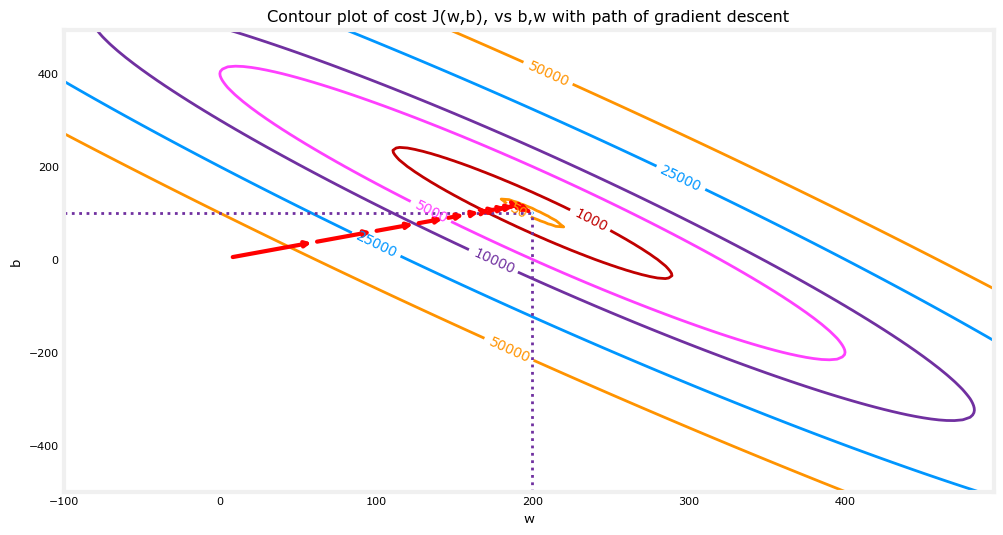

In [94]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)